In [2]:
import numpy as np
import matplotlib.pyplot as plt
import CESfunctionsJUNOx23 as cf
from scipy.signal import savgol_filter

In [3]:
Ib=np.loadtxt('Ib2306171151.txt')
Iz=np.loadtxt('Iz2306171153.txt')
Im=np.load('Im2306171255.npy')
NO2= np.load('NO2_JUNOx23.npy')

In [4]:
calfactors=(3.10322588e+02-3.3, 1.72905279e-01,
            -1.48816626e-05,1.95619706e-09)

wls = cf.avantes_calibrator(1024,*calfactors)

In [5]:
Iba = np.average(Ib[:,1:],axis=1)
print(Iba.shape)
Iza = np.average(Iz[:,1:],axis=1)
print(Iza.shape)

(1024,)
(1024,)


In [6]:
Im.shape

(1024, 361)

In [7]:
NO2.shape

(1024, 2)

In [8]:
NO2int = np.interp(wls[:,0],NO2[:,0],NO2[:,1])
NO2i = np.column_stack((wls,NO2int))
minwave,maxwave = cf.segment_indices(NO2i,395,420)
print(minwave,maxwave)
spect=np.column_stack((wls,Iza))
minwave,maxwave = cf.segment_indices(spect,395,420)
print(minwave,maxwave)

531 690
531 690


In [9]:
print(NO2i.shape,spect.shape)

(1024, 2) (1024, 2)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8884\479336780.py:7: RuntimeWarning: divide by zero encountered in divide
  ext = (1/47)*((I_0/I_sample)-1)*(1-.999915)


(2e-07, 4e-07)

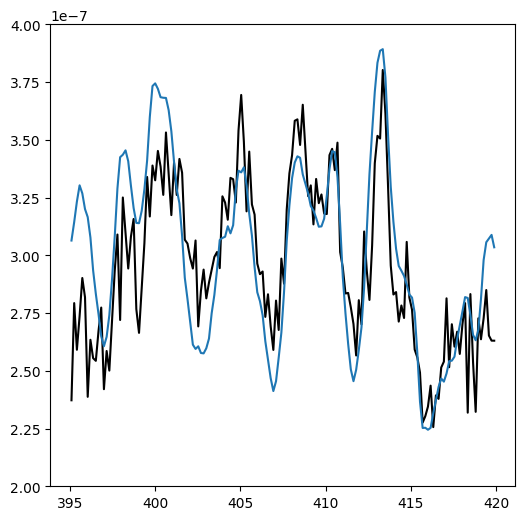

In [10]:
n=350
I_0 = Iza-Iba
I_sample = Im[:,n]-Iba
f= plt.figure(figsize=(6,6))
ax1 = f.add_subplot(111)

ext = (1/47)*((I_0/I_sample)-1)*(1-.999915)
ax1.plot(wls[minwave:maxwave],ext[minwave:maxwave],'-k')
ax1.plot(NO2i[minwave:maxwave,0],NO2i[minwave:maxwave,1]*20*2.5e10)
#ax1.set_xlim(395,420)
ax1.set_ylim(2e-7,4e-7)
#ax1.set_title("HgAr lamp",size=16)

In [10]:
alpha,fl,a,b,ndensity1 = cf.fit_alg_1A(I_sample[minwave:maxwave], I_0[minwave:maxwave], .999915, 47, NO2i[minwave:maxwave],parameters=1)

First N1:  15.951584066534116  Second N1:  15.901100502540785


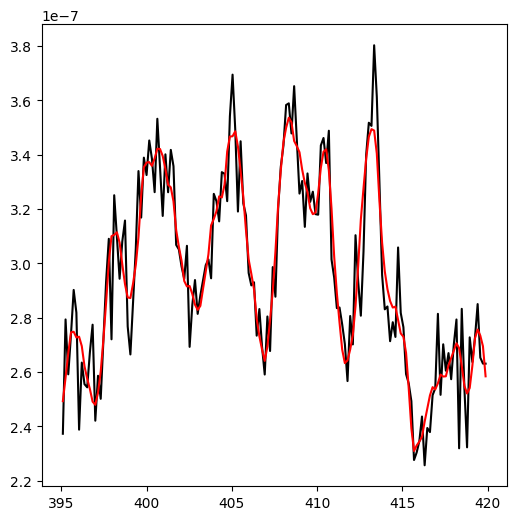

In [11]:
f= plt.figure(figsize=(6,6))
ax1 = f.add_subplot(111)

ax1.plot(wls[minwave:maxwave],alpha,'-k')
ax1.plot(NO2i[minwave:maxwave,0],NO2i[minwave:maxwave,1]*ndensity1+b*fl+a,'-r')
#ax1.set_xlim(395,420)
#ax1.set_ylim(2e-7,4e-7)
#ax1.set_title("HgAr lamp",size=16)

In [24]:
n=10
start_avg=3
lower_wavelength = 395
upper_wavelength = 420
background=np.loadtxt('Ib2306171710.txt')
zeroair=np.loadtxt('Iz2306171711.txt')
Im=np.load('Im2306171716.npy')
no2reference= np.load('NO2_JUNOx23.npy')
Refff = np.load('Reff.npy')
Reff = Refff.reshape(len(Refff),1)

counts = np.copy(Im[:,n]).reshape(len(Im[:,1]),1)
minwave,maxwave = cf.segment_indices(no2reference,lower_wavelength,
                upper_wavelength)

bckg = np.copy(background[minwave:maxwave,:])
zero = np.copy(zeroair[minwave:maxwave,:])
no2ref = np.copy(no2reference[minwave:maxwave,:])
I_s = np.copy(counts[minwave:maxwave,:])
I_b = np.average(bckg[:,1:],axis=1).reshape(len(bckg),1)
I_not = np.average(zero[:,start_avg:],axis=1).reshape(len(zero),1)
I_0 = np.subtract(I_not,I_b)
I_sample = np.subtract(I_s,I_b)

alpha,fl,a,b,ndensity1 = cf.fit_alg_1A(I_sample, I_0, Reff, 44.17, 
            no2ref,parameters=1)


First N1:  18.022307301938323  Second N1:  18.12703464890062


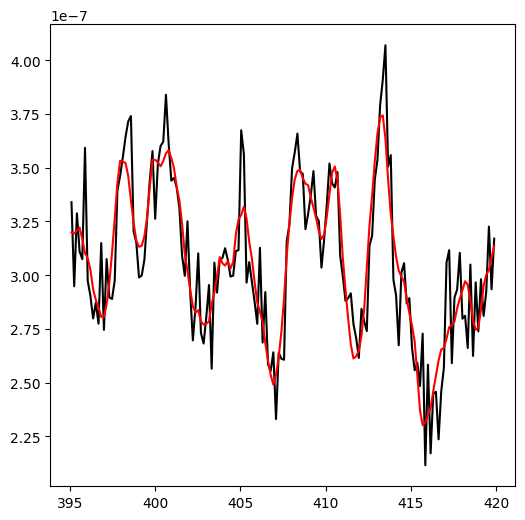

In [13]:
f= plt.figure(figsize=(6,6))
ax1 = f.add_subplot(111)

ax1.plot(no2ref[:,0],alpha,'-k')
ax1.plot(no2ref[:,0],no2ref[:,1]*ndensity1+b*fl+a,'-r')
#ax1.plot(no2ref[:,0],no2ref[:,1]*5e11,'-b')
#ax1.set_xlim(395,420)
#ax1.set_ylim(2e-7,4e-7)
#ax1.set_title("HgAr lamp",size=16)

In [26]:
a = (1/44.17)*((I_0/I_sample)-1)
print(a.shape)
Reff_curve = 1-((no2ref[:,1]*20*2.5e10)/a[:,0])
print(Reff_curve.shape)

(159, 1)
(159,)


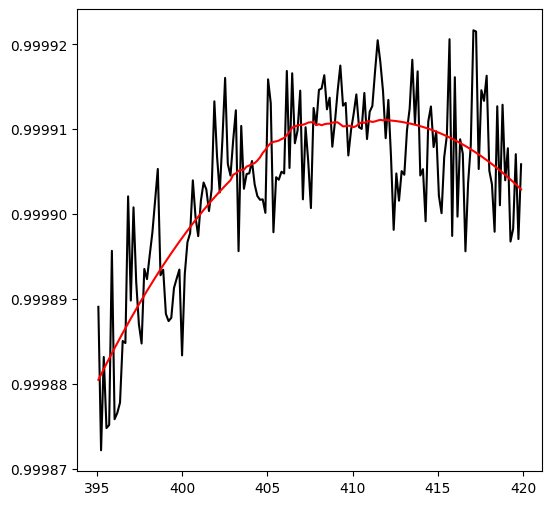

In [27]:
f= plt.figure(figsize=(6,6))
ax1 = f.add_subplot(111)

ax1.plot(no2ref[:,0],Reff_curve,'-k')
ax1.plot(no2ref[:,0],savgol_filter(Reff_curve,100,2),'-r')
#ax1.plot(no2ref[:,0],no2ref[:,1]*20*2.5e10,'-r')
#ax1.plot(no2ref[:,0],no2ref[:,1]*5e11,'-b')
#ax1.set_xlim(395,420)
#ax1.set_ylim(.99999999,1.00000001)
#ax1.set_title("HgAr lamp",size=16)

In [19]:
np.save('Reff.npy',savgol_filter(Reff_curve,100,2))

In [20]:
no2ref[58,0]

404.2581576549257

In [78]:
p=np.load('tau2306171733.npy')
nop=np.load('tau2306171737.npy')
print(np.average(p),np.std(p),np.average(nop),np.std(nop))


19.42034974211271 0.04383118919327727 19.411771541749783 0.036696036659153726


In [11]:
np.save('NO2_JUNOx23',NO2i)

In [142]:
no2ref= np.load('NO2_JUNOx23.npy')
np.savetxt('NO2_JUNOx23.txt',no2ref)

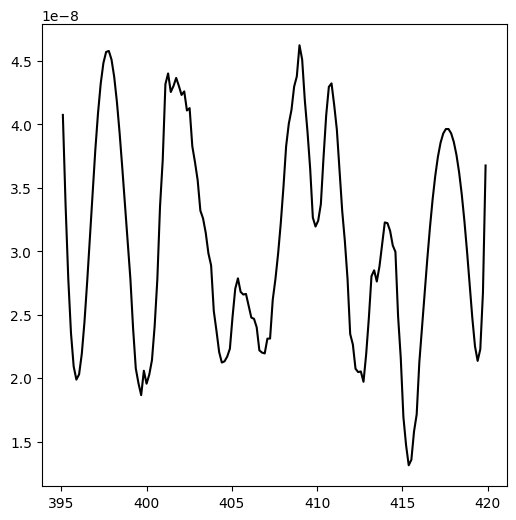

In [37]:
alpha = cf.extinction(I_sample,I_0,Reff,44.17)
a,b,c = cf.fit_signal(alpha,no2ref)
density1 = c
if c < 0:
    c=0
alpha = alpha.reshape(len(alpha),1)
fl = cf.get_fl_broadA(alpha,no2ref,c,npoints=51,npoly=8)
f= plt.figure(figsize=(6,6))
ax1 = f.add_subplot(111)

ax1.plot(no2ref[:,0],fl,'-k')
#ax1.plot(no2ref[:,0],no2ref[:,1]*ndensity1+b*fl+a,'-r')
#ax1.plot(no2ref[:,0],no2ref[:,1]*5e11,'-b')
#ax1.set_xlim(395,420)
#ax1.set_ylim(2e-7,4e-7)
#ax1.set_title("HgAr lamp",size=16)


18.12703464890062
18.131017204617656
18.139662273352588


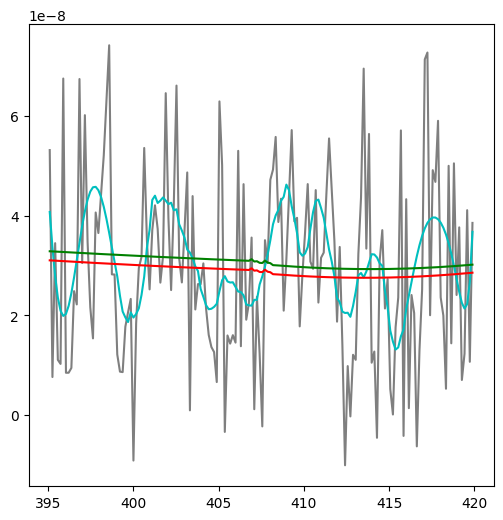

In [54]:
alpha = cf.extinction(I_sample,I_0,Reff,44.17)
a,b,c = cf.fit_signal(alpha,no2ref)
density1 = c
if c < 0:
    c=0
alpha = alpha.reshape(len(alpha),1)
fl = cf.get_fl_broadA(alpha,no2ref,c,npoints=51,npoly=8)
a,b,c = cf.fit_signal_w_flA(alpha,fl,no2ref)
print(c/2.5e10)

alpha = cf.extinction(I_sample,I_0,Reff,44.17)
a,b,c = cf.fit_signal(alpha,no2ref)
density1 = c
if c < 0:
    c=0
alpha = alpha.reshape(len(alpha),1)
fl2 = cf.get_fl_broadA(alpha,no2ref,c,npoints=150,npoly=2)
a,b,c = cf.fit_signal_w_flA(alpha,fl2,no2ref)
print(c/2.5e10)

alpha = cf.extinction(I_sample,I_0,Reff,44.17)
a,b,c = cf.fit_signal(alpha,no2ref)
density1 = c
if c < 0:
    c=0
alpha = alpha.reshape(len(alpha),1)
for i in range(10):
    flt = cf.get_fl_broadA(alpha,no2ref,c,npoints=150,npoly=2)
    a,b,c = cf.fit_signal_w_flA(alpha,flt,no2ref)
fl3 = cf.get_fl_broadA(alpha,no2ref,c,npoints=150,npoly=2)
a,b,c = cf.fit_signal_w_flA(alpha,fl3,no2ref)
print(c/2.5e10)


a = (1/44.17)*((I_0/I_sample)-1)*(1-Reff)
#print(a.shape)
fl_meas = a-(no2ref[:,1].reshape(len(no2ref[:,1]),1)*18.12*2.5e10)
#print(fl_meas.shape)

f= plt.figure(figsize=(6,6))
ax1 = f.add_subplot(111)

ax1.plot(no2ref[:,0],fl_meas,'-k',alpha=0.5)
ax1.plot(no2ref[:,0],fl,'-c')
ax1.plot(no2ref[:,0],fl2,'-g')
ax1.plot(no2ref[:,0],fl3,'-r')
#ax1.plot(no2ref[:,0],no2ref[:,1]*ndensity1+b*fl+a,'-r')
#ax1.plot(no2ref[:,0],no2ref[:,1]*5e11,'-b')
#ax1.set_xlim(395,420)
#ax1.set_ylim(2e-7,4e-7)
#ax1.set_title("HgAr lamp",size=16)


(159, 1)
(159,)


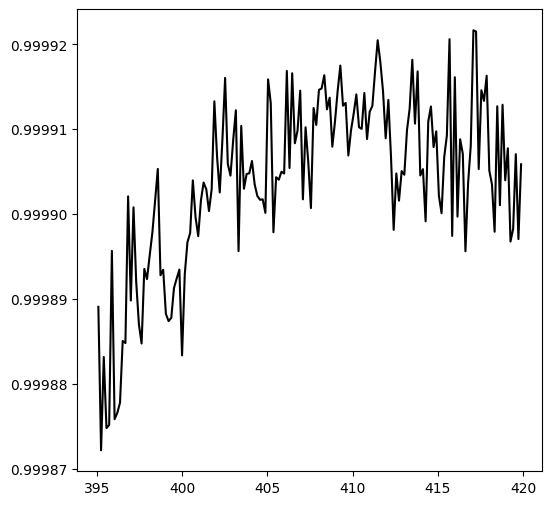

In [35]:
a = (1/44.17)*((I_0/I_sample)-1)
print(a.shape)
fl = 1-((no2ref[:,1]*20*2.5e10)/a[:,0])
print(Reff_curve.shape)
f= plt.figure(figsize=(6,6))
ax1 = f.add_subplot(111)

ax1.plot(no2ref[:,0],Reff_curve,'-k')
#ax1.plot(no2ref[:,0],savgol_filter(Reff_curve,100,2),'-r')
#ax1.plot(no2ref[:,0],no2ref[:,1]*20*2.5e10,'-r')
#ax1.plot(no2ref[:,0],no2ref[:,1]*5e11,'-b')
#ax1.set_xlim(395,420)
#ax1.set_ylim(.99999999,1.00000001)
#ax1.set_title("HgAr lamp",size=16)

In [42]:
arraytest = np.array([3,2,1])
np.power(arraytest.reshape(len(arraytest),1),2)

array([[9],
       [4],
       [1]], dtype=int32)

In [43]:
np.power(2,3)

8

In [7]:
def extinction(I_sample, I_0, Reff, distance):
    """Calculates extinction spectrum"""
    I_ratio=(I_0/I_sample)
    #print(I_ratio.shape)
    return (1/distance)*(I_ratio-1)*(1-Reff)


def fit_alg_1B(I_sample,I_0,Reff,distance,reference1):
    """Fitting algorithm 1:
    Calculates the extinction, fits two references using SVD, then obtains a 
    parametric function, recalculates the original extinction with the two
    references and the parametric function
    
    Orignally developed to try to clean the glyoxal area (450nm) of the signal as much as possible."""

    alpha = extinction(I_sample,I_0,Reff,distance)
    a,b,c,d,e,ndensity = fit_signalA(alpha,reference1)
    return (a,b,c,d,e),ndensity

def fit_signalA(extinction,reference):
    """Uses Singular Value Decomposition to fit a reference with a slope to the 
    extinction spectrum (or extinction minus the parametric function of wavelength). 
    Returns a,b,c,i.e., the coefficients of a+b*wavelength+c*$\sigma$"""
    #print(extinction.shape)
    ext=np.copy(extinction).reshape(len(extinction),1)
    ones = np.ones((len(extinction),1))
    ref = np.copy(reference)
    wls = np.copy(ref[:,0]).reshape(len(ref[:,0]),1)
    sigma_no2 = np.copy(ref[:,1]).reshape(len(ref[:,1]),1)
    svdmat=np.concatenate((ones,wls,np.power(wls,2),np.power(wls,3),np.power(wls,4),ref),axis=1)
    U, S, Vt = np.linalg.svd(svdmat,full_matrices=False)
    x_hat = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ ext
    a=x_hat[0,0]
    b=x_hat[1,0]
    c=x_hat[2,0]
    d=x_hat[3,0]
    e=x_hat[4,0]
    f=x_hat[5,0]
    return a,b,c,d,e,f





n=10
start_avg=3
lower_wavelength = 395
upper_wavelength = 420
background=np.loadtxt('Ib2306171710.txt')
zeroair=np.loadtxt('Iz2306171711.txt')
Im=np.load('Im2306171716.npy')
no2reference= np.load('NO2_JUNOx23.npy')
Refff = np.load('Reff.npy')
Reff = Refff.reshape(len(Refff),1)

counts = np.copy(Im[:,n]).reshape(len(Im[:,1]),1)
minwave,maxwave = cf.segment_indices(no2reference,lower_wavelength,
                upper_wavelength)

bckg = np.copy(background[minwave:maxwave,:])
zero = np.copy(zeroair[minwave:maxwave,:])
no2ref = np.copy(no2reference[minwave:maxwave,:])
I_s = np.copy(counts[minwave:maxwave,:])
I_b = np.average(bckg[:,1:],axis=1).reshape(len(bckg),1)
I_not = np.average(zero[:,start_avg:],axis=1).reshape(len(zero),1)
I_0 = np.subtract(I_not,I_b)
I_sample = np.subtract(I_s,I_b)

coefs,ndensity1 = fit_alg_1B(I_sample, I_0, Reff, 44.17, 
            no2ref)
print(coefs,ndensity1)

(0.9582662182455272, 33401.413701890706, 2.795438423772005e-06, 1.1303756199060731e-09, 1.9488097217968795e-13) -33401.416914038


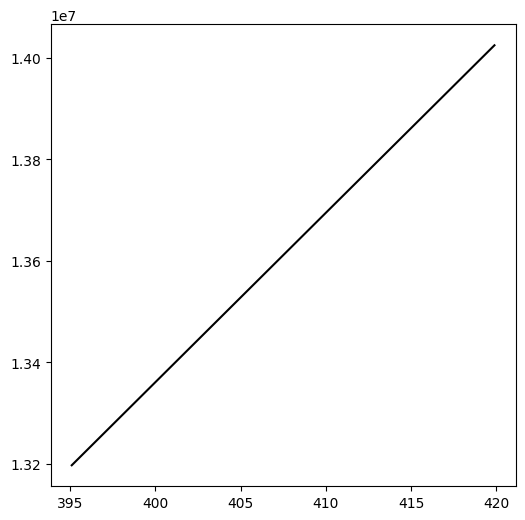

In [8]:
def fl_calc(x,a,b,c,d,e):
    return a+b*x+c*np.power(x,2)+d*np.power(x,3)+e*np.power(x,4)

f= plt.figure(figsize=(6,6))
ax1 = f.add_subplot(111)

ax1.plot(no2ref[:,0],fl_calc(no2ref[:,0],*coefs),'-k')
#ax1.plot(no2ref[:,0],no2ref[:,1]*ndensity1+b*fl+a,'-r')
#ax1.plot(no2ref[:,0],no2ref[:,1]*5e11,'-b')
#ax1.set_xlim(395,420)
#ax1.set_ylim(2e-7,4e-7)
#ax1.set_title("HgAr lamp",size=16)


In [11]:
def extinction(I_sample, I_0, Reff, distance):
    """Calculates extinction spectrum"""
    I_ratio=(I_0/I_sample)
    #print(I_ratio.shape)
    return (1/distance)*(I_ratio-1)*(1-Reff)


def fit_alg_1B(I_sample,I_0,Reff,distance,reference1):
    """Fitting algorithm 1:
    Calculates the extinction, fits two references using SVD, then obtains a 
    parametric function, recalculates the original extinction with the two
    references and the parametric function
    
    Orignally developed to try to clean the glyoxal area (450nm) of the signal as much as possible."""

    alpha = extinction(I_sample,I_0,Reff,distance)
    a,b,c,ndensity = fit_signalA(alpha,reference1)
    return (a,b,c),ndensity

def fit_signalA(extinction,reference):
    """Uses Singular Value Decomposition to fit a reference with a slope to the 
    extinction spectrum (or extinction minus the parametric function of wavelength). 
    Returns a,b,c,i.e., the coefficients of a+b*wavelength+c*$\sigma$"""
    #print(extinction.shape)
    ext=np.copy(extinction).reshape(len(extinction),1)
    ones = np.ones((len(extinction),1))
    ref = np.copy(reference)
    wls = np.copy(ref[:,0]).reshape(len(ref[:,0]),1)
    sigma_no2 = np.copy(ref[:,1]).reshape(len(ref[:,1]),1)
    svdmat=np.concatenate((ones,wls,np.power(wls,2),ref),axis=1)
    U, S, Vt = np.linalg.svd(svdmat,full_matrices=False)
    x_hat = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ ext
    a=x_hat[0,0]
    b=x_hat[1,0]
    c=x_hat[2,0]
    d=x_hat[3,0]
    return a,b,c,d





n=10
start_avg=3
lower_wavelength = 395
upper_wavelength = 420
background=np.loadtxt('Ib2306171710.txt')
zeroair=np.loadtxt('Iz2306171711.txt')
Im=np.load('Im2306171716.npy')
no2reference= np.load('NO2_JUNOx23.npy')
Refff = np.load('Reff.npy')
Reff = Refff.reshape(len(Refff),1)

counts = np.copy(Im[:,n]).reshape(len(Im[:,1]),1)
minwave,maxwave = cf.segment_indices(no2reference,lower_wavelength,
                upper_wavelength)

bckg = np.copy(background[minwave:maxwave,:])
zero = np.copy(zeroair[minwave:maxwave,:])
no2ref = np.copy(no2reference[minwave:maxwave,:])
I_s = np.copy(counts[minwave:maxwave,:])
I_b = np.average(bckg[:,1:],axis=1).reshape(len(bckg),1)
I_not = np.average(zero[:,start_avg:],axis=1).reshape(len(zero),1)
I_0 = np.subtract(I_not,I_b)
I_sample = np.subtract(I_s,I_b)

coefs,ndensity1 = fit_alg_1B(I_sample, I_0, Reff, 44.17, 
            no2ref)
print(coefs,ndensity1)

(6.701022776235524e-05, -873997.1237778168, 1.3546767739505688e-10) 873997.1237776938


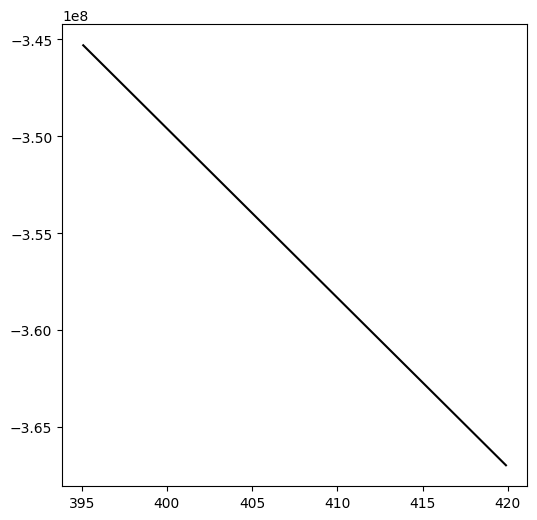

In [13]:
def fl_calc(x,a,b,c):
    return a+b*x+c*np.power(x,2)

f= plt.figure(figsize=(6,6))
ax1 = f.add_subplot(111)

ax1.plot(no2ref[:,0],fl_calc(no2ref[:,0],*coefs),'-k')
#ax1.plot(no2ref[:,0],no2ref[:,1]*ndensity1+b*fl+a,'-r')
#ax1.plot(no2ref[:,0],no2ref[:,1]*5e11,'-b')
#ax1.set_xlim(395,420)
#ax1.set_ylim(2e-7,4e-7)
#ax1.set_title("HgAr lamp",size=16)


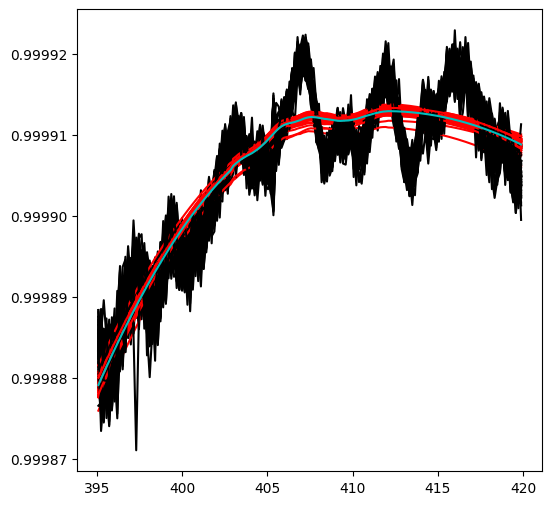

In [26]:
import glob

f= plt.figure(figsize=(6,6))
ax1 = f.add_subplot(111)
start_avg=2
lower_wavelength = 395
upper_wavelength = 420
bfile = glob.glob('.\\setReff\\Ib*')
zfile = glob.glob('.\\setReff\\Iz*')
mfiles = glob.glob('.\\setReff\\Im*')
zeroair=np.loadtxt(zfile[0])
background=np.loadtxt(bfile[0])
no2reference= np.load('NO2_JUNOx23.npy')
filters = np.arange(159)

for ele in mfiles:
    Im = np.loadtxt(ele)
    counts = np.copy(Im[:,1]).reshape(len(Im[:,1]),1)
    minwave,maxwave = cf.segment_indices(no2reference,lower_wavelength,
                upper_wavelength)

    bckg = np.copy(background[minwave:maxwave,:])
    zero = np.copy(zeroair[minwave:maxwave,:])
    no2ref = np.copy(no2reference[minwave:maxwave,:])
    I_s = np.copy(counts[minwave:maxwave,:])
    I_b = np.average(bckg[:,1:],axis=1).reshape(len(bckg),1)
    I_not = np.average(zero[:,start_avg:],axis=1).reshape(len(zero),1)
    I_0 = np.subtract(I_not,I_b)
    I_sample = np.subtract(I_s,I_b)

    a = (1/44.17)*((I_0/I_sample)-1)
    #print(a.shape)
    Reff_curve = 1-((no2ref[:,1]*163.9*2.5e10)/a[:,0])
    #print(Reff_curve.shape)

    filters = np.column_stack((filters,savgol_filter(Reff_curve,100,2)))
    ax1.plot(no2ref[:,0],Reff_curve,'-k')
    ax1.plot(no2ref[:,0],savgol_filter(Reff_curve,100,2),'-r')
ax1.plot(no2ref[:,0],np.average(filters[:,1:],axis=1),'-c')
#ax1.plot(no2ref[:,0],no2ref[:,1]*5e11,'-b')
#ax1.set_xlim(395,420)
#ax1.set_ylim(.99999999,1.00000001)
#ax1.set_title("HgAr lamp",size=16)

In [27]:
np.save('Reff.npy',np.average(filters[:,1:],axis=1))

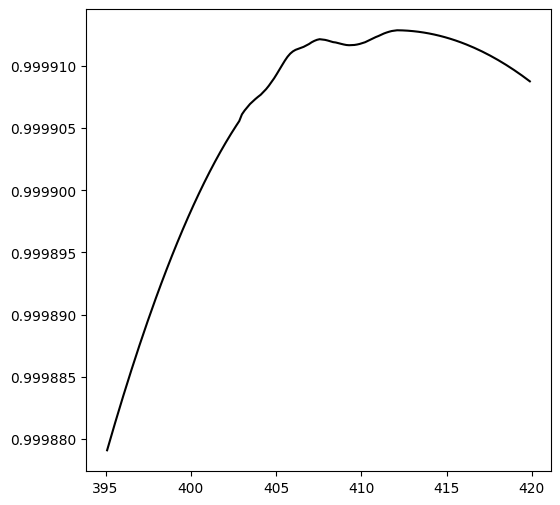

In [30]:
Reff = np.load('Reff.npy')
f= plt.figure(figsize=(6,6))
ax1 = f.add_subplot(111)

ax1.plot(no2ref[:,0],Reff,'-k')

In [37]:
calfactors=(3.10322588e+02-3.3, 1.72905279e-01,
            -1.48816626e-05,1.95619706e-09)

wls = cf.avantes_calibrator(1024,*calfactors)

In [48]:
wl = 405.8
wn = (1/wl)*1e7
a = 5677.465
b = 318.81874e12
c = 14.4e9
N = 2.546899e19
Fk = 1.034+3.17e-12*np.power(wn,2)
pre_n = a + (b/(c-np.power(wn,2))) 
n = (pre_n/1e8)+1
sigma_1st = 24 * np.power(np.pi,3) * np.power(wn,4)/np.power(N,2)
sigma_2nd = (np.power(n,2)-1)/(np.power(n,2)+2)
sigmaN2 = sigma_1st * np.power(sigma_2nd,2)*Fk
print(wn,n,sigmaN2)

wn = (1/wl)*1e7
a = 20564.8
b = 2.480899e13
c = 4.09e9
N = 2.68678e19
Fk = 1.096+1.385e-11*np.power(wn,2)+1.448e-20*np.power(wn,4)
pre_n = a + (b/(c-np.power(wn,2))) 
n = (pre_n/1e8)+1
sigma_1st = 24 * np.power(np.pi,3) * np.power(wn,4)/np.power(N,2)
sigma_2nd = (np.power(n,2)-1)/(np.power(n,2)+2)
sigmaO2 = sigma_1st * np.power(sigma_2nd,2)*Fk
print(wn,n,sigmaO2)

wn = (1/wl)*1e7
a = 6432.135
b = 286.06021e12
c = 14.4e9
N = 2.546899e19
Fk = 1
pre_n = a + (b/(c-np.power(wn,2))) 
n = (pre_n/1e8)+1
sigma_1st = 24 * np.power(np.pi,3) * np.power(wn,4)/np.power(N,2)
sigma_2nd = (np.power(n,2)-1)/(np.power(n,2)+2)
sigmaAr = sigma_1st * np.power(sigma_2nd,2)*Fk
print(wn,n,sigmaAr)

print(sigmaN2*.78084+sigmaO2*.20947+sigmaAr*.00934)

24642.681123706257 1.0002879243563363 1.6145450160768153e-26
24642.681123706257 1.0002768821499641 1.437278913976231e-26
24642.681123706257 1.000271720493275 1.388072541023237e-26
1.5747327419971785e-26


In [50]:
sigmas_N2 = []
for wl in wls:
    wn = (1/wl)*1e7
    a = 5677.465
    b = 318.81874e12
    c = 14.4e9
    N = 2.546899e19
    Fk = 1.034+3.17e-12*np.power(wn,2)
    pre_n = a + (b/(c-np.power(wn,2))) 
    n = (pre_n/1e8)+1
    sigma_1st = 24 * np.power(np.pi,3) * np.power(wn,4)/np.power(N,2)
    sigma_2nd = (np.power(n,2)-1)/(np.power(n,2)+2)
    sigma = sigma_1st * np.power(sigma_2nd,2)*Fk
    sigmas_N2.append(sigma[0])

sigmas_O2 = []
for wl in wls:
    wn = (1/wl)*1e7
    a = 20564.8
    b = 2.480899e13
    c = 4.09e9
    N = 2.68678e19
    Fk = 1.096+1.385e-11*np.power(wn,2)+1.448e-20*np.power(wn,4)
    pre_n = a + (b/(c-np.power(wn,2))) 
    n = (pre_n/1e8)+1
    sigma_1st = 24 * np.power(np.pi,3) * np.power(wn,4)/np.power(N,2)
    sigma_2nd = (np.power(n,2)-1)/(np.power(n,2)+2)
    sigma = sigma_1st * np.power(sigma_2nd,2)*Fk
    sigmas_O2.append(sigma[0])
    
sigmas_Ar = []
for wl in wls:
    wn = (1/wl)*1e7
    a = 6432.135
    b = 286.06021e12
    c = 14.4e9
    N = 2.546899e19
    Fk = 1
    pre_n = a + (b/(c-np.power(wn,2))) 
    n = (pre_n/1e8)+1
    sigma_1st = 24 * np.power(np.pi,3) * np.power(wn,4)/np.power(N,2)
    sigma_2nd = (np.power(n,2)-1)/(np.power(n,2)+2)
    sigmaAr = sigma_1st * np.power(sigma_2nd,2)*Fk
    sigmas_Ar.append(sigma[0])

In [51]:
sigma_Air = np.array(sigmas_N2)*.78084+np.array(sigmas_O2)*.20947+np.array(sigmas_Ar)*.00934

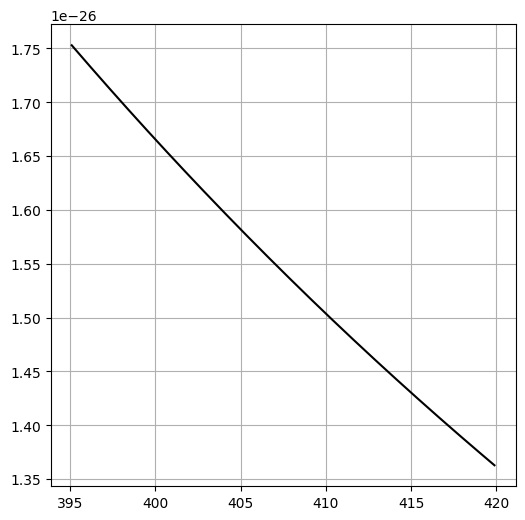

In [56]:
f= plt.figure(figsize=(6,6))
ax1 = f.add_subplot(111)

ax1.plot(wls[minwave:maxwave],sigma_Air[minwave:maxwave],'-k')
ax1.grid()

In [57]:
np.save('sigma_ray_short',sigma_Air[minwave:maxwave])

In [55]:
minwave,maxwave = cf.segment_indices(no2reference,lower_wavelength,
                upper_wavelength)